In [2]:
import os
from dotenv import load_dotenv

load_dotenv()  # .env 파일에서 환경 변수를 읽어와 시스템 환경 변수에 추가

hf_token = os.getenv("HF_TOKEN")

import huggingface_hub
huggingface_hub.login(token=hf_token)
your_username='kresnik'

In [3]:
from smolagents import Tool
from IPython.display import Image, display

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

image = image_generation_tool("A sunny beach")

# image 변수가 이미지 파일의 경로(예: ./generated_image.png)라고 가정
display(Image(filename=image))

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Improve this prompt, then generate an image of it., prompt='A rabbit wearing a space suit'                                                                                                           │
│                                                                                                                                                                                                      │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 improved_prompt = 'A realistic depiction of a rabbit wearing a high-tech space suit, exploring the surface of Mars with a火星 rover, under the red sky.'                                         │
│   2 print(improved_prompt)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
A realistic depiction of a rabbit wearing a high-tech space suit, exploring the surface of Mars with a火星 rover, under the red sky.

Out: None

[Step 0: Duration 0.19 seconds| Input tokens: 2,034 | Output tokens: 88]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 image = image_generator(prompt=improved_prompt)                                                                                                                                                  │
│   2 final_answer(image)                                                                                                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: /private/var/folders/v9/sz7nll453430z6qzb36smt5r0000gn/T/gradio/ad8bab5c4a529ac4a461889542d6745fe88219c414eef597d0b0c04329263cfd/image.webp

[Step 1: Duration 7.56 seconds| Input tokens: 4,287 | Output tokens: 143]

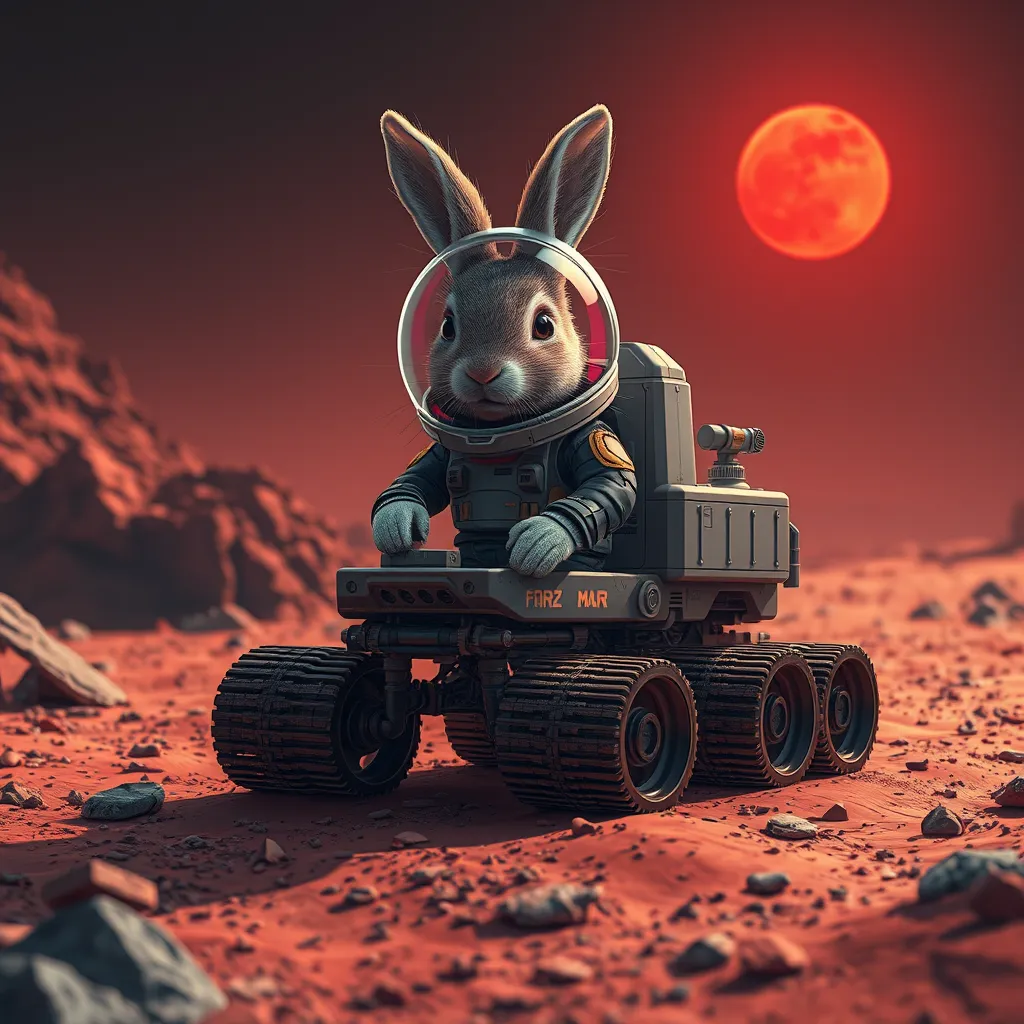

In [8]:
from smolagents import CodeAgent, HfApiModel

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")
agent = CodeAgent(tools=[image_generation_tool], model=model)

image = agent.run(
    "Improve this prompt, then generate an image of it., prompt='A rabbit wearing a space suit'"
)

display(Image(filename=image))